In [1]:
import numpy as np


# création d'une matrice

In [2]:
a = np.zeros((2,3))
a

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [3]:
b = np.ones((3,2))
b

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [4]:
v = np.array([1,2,3])
v

array([1, 2, 3])

# taille et transposition

In [5]:
b.shape

(3, 2)

In [6]:
b.T

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [7]:
v.shape

(3,)

In [8]:
v2d = np.atleast_2d(v)
v2d.shape

(1, 3)

# sauvegarde d'une matrice dans un fichier

In [9]:
r = np.random.rand(3,3)
r

array([[ 0.44411773,  0.09701556,  0.66588604],
       [ 0.21113016,  0.96588104,  0.30506055],
       [ 0.60577868,  0.90670743,  0.74482992]])

In [10]:
np.savetxt('random_mat.csv',r,delimiter=',',fmt='%.3e')

In [11]:
for l in open('random_mat.csv'):
    print(l)

4.441e-01,9.702e-02,6.659e-01

2.111e-01,9.659e-01,3.051e-01

6.058e-01,9.067e-01,7.448e-01



In [12]:
rr = np.loadtxt('random_mat.csv',delimiter=',')
rr

array([[ 0.4441 ,  0.09702,  0.6659 ],
       [ 0.2111 ,  0.9659 ,  0.3051 ],
       [ 0.6058 ,  0.9067 ,  0.7448 ]])

# slicing/indexation

In [13]:
r

array([[ 0.44411773,  0.09701556,  0.66588604],
       [ 0.21113016,  0.96588104,  0.30506055],
       [ 0.60577868,  0.90670743,  0.74482992]])

In [14]:
r[0,2]

0.66588604152225184

In [15]:
r[:,0]

array([ 0.44411773,  0.21113016,  0.60577868])

In [16]:
r[0,:]

array([ 0.44411773,  0.09701556,  0.66588604])

In [17]:
m = [0,1,2]
n = [1,1,0]
r[m,n]

array([ 0.09701556,  0.96588104,  0.60577868])

# broatcasting

In [18]:
#!!! multiplication terme à terme
a*b

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [19]:
a*b.T

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [20]:
b*2

array([[ 2.,  2.],
       [ 2.,  2.],
       [ 2.,  2.]])

In [21]:
c = a + 1
c

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [22]:
c*v

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

# produit scalaire

In [23]:
np.dot(a,b)

array([[ 0.,  0.],
       [ 0.,  0.]])

In [24]:
np.dot(c,v)

array([ 6.,  6.])

# Déterminant et inversion de matrice

In [25]:
d = np.linalg.det(r)
d

-0.062809189664407197

In [26]:
np.linalg.det(np.identity(3))

1.0

In [27]:
np.linalg.det(np.array([[1,0,0],[0,2,0],[0,0,3]]))

6.0

In [28]:
ir = np.linalg.inv(r)
ir

array([[-7.05018542, -8.46219686,  9.76881071],
       [-0.43852055,  1.15568117, -0.08129107],
       [ 6.26782274,  5.47555045, -6.50353856]])

In [29]:
p = np.dot(ir,r)
p

array([[  1.00000000e+00,   0.00000000e+00,   8.88178420e-16],
       [  5.55111512e-17,   1.00000000e+00,   2.08166817e-17],
       [  4.44089210e-16,   0.00000000e+00,   1.00000000e+00]])

In [30]:
np.round(p,decimals=2)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

résolution d'un système linéaire

$
\begin{align}
x+y =2\\
2x+y = 3
\end{align}
$

notation matricielle:
$ ax = b $

avec

$a =
\left(
\begin{array}{cc}
1 & 1\\
2 & 1\\
\end{array}
\right)$

et

$b =
\left(
\begin{array}{c}
1 \\
2 \\
\end{array}
\right)$

$a^{-1}.a x = I.x =  a^{-1}.b$

$x = a^{-1}.b$


In [31]:
a = np.array([[1,1],[2,1]])
b = np.array([2,3])
inv_a = np.linalg.inv(a)
np.dot(inv_a,b)

array([ 1.,  1.])

# vitesse

In [32]:
r = np.random.rand(3,3)
%timeit ir = np.linalg.inv(r)

10000 loops, best of 3: 27.7 µs per loop


In [33]:
r = np.random.rand(3000,3000)
%timeit np.linalg.inv(r)

1 loop, best of 3: 1.59 s per loop


In [34]:
p = np.dot(np.linalg.inv(r),r)

Populating the interactive namespace from numpy and matplotlib


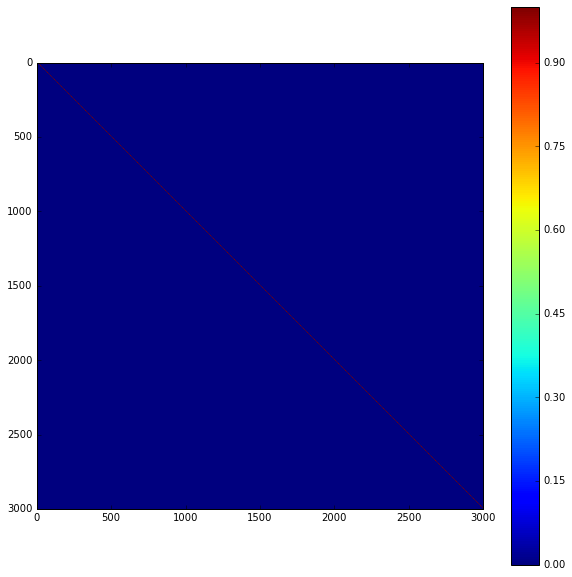

In [35]:
import matplotlib.pyplot as plt
%pylab inline
plt.figure(figsize=[10,10])
plt.imshow(p)
plt.colorbar();

# Valeurs et vecteurs propres d'une matrice

In [36]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/NV-xna7ftmk?rel=0&amp;controls=1&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

calculer les valeurs propres de la matrice $a$

$a =
\left(
\begin{array}{ccc}
-1 & 2 & 2\\
2 & 2 & -1\\
2 & -1 & 2\\
\end{array}
\right)$

In [37]:
a = np.array([[-1,2,2],[2,2,-1],[2,-1,2]])
a

array([[-1,  2,  2],
       [ 2,  2, -1],
       [ 2, -1,  2]])

In [38]:
l,v = np.linalg.eig(a)

In [39]:
l

array([-3.,  3.,  3.])

In [40]:
v

array([[-0.81649658,  0.57735027, -0.27602622],
       [ 0.40824829,  0.57735027, -0.89708523],
       [ 0.40824829,  0.57735027,  0.34503278]])